In [1]:
import string
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import time
import random as rn
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from matplotlib import cm
import matplotlib.patches as mpl_patches
from matplotlib import rcParams
from io import StringIO
import matplotlib.tri as mtri
colormap = cm.inferno
plt.rcParams.update({'font.size': 20})

In [2]:
L = 40
nmax = 1

In [3]:
def tri_conv(n):
    
        x = []
        y = []
        for i in n:
            x.append(i % L - 0.5 * int(i / L))
            y.append(int(i/L) * np.sqrt(3)/2)
        
        return x, y


# triangle
def trian():
        # indices for entire lattice
        ind = np.array([i for i in range(L*L)])
        # x and y coordinate for each lattice point
        x = tri_conv(ind)[0]
        y = tri_conv(ind)[1]
        
        #for i in range(len(x)):
        #    x[i] += 10

        triangles = []

        for j in range(L-1):
            for i in range(L-1):
                i = i + j * L
                triangles.append([i, i+1, i+L+1])
                triangles.append([i+L, i, i+1+L])
        triang = mtri.Triangulation(x, y, triangles)
        return triang
def hex_cor(n, j):
    """function that converts the index n and site index j into coordinates x and y, with x being horisontal.

        Args:
            n (int): index of particle in lattice

        Returns:
            tuple: x and y coordinates
    """
        
    xf = []
    yf = []

    c30 = np.cos(np.pi/6)
    s30 = np.sin(np.pi/6)

    for k in range(len(n)):
        y = int(n[k]/L)
        x = 2 * (n[k]%L) + j[k] - y
        x += 1
        xf.append(x * c30)
        if (y%2 == 1):
            if (x%2 == 1):
                yf.append(y * (1 + s30))
            else:
                yf.append((y * 3 + 1)/2)
        else:
            if (x%2 == 1):
                yf.append(1.5 * y + 0.5)
            else:
                yf.append(1.5 * y)

    return xf, yf

def hex_cor_int( n, j):
    xf = 0
    yf = 0

    c30 = np.cos(np.pi/6)
    s30 = np.sin(np.pi/6)

        
    y = int(n/L)
    x = 2 * (n%L) + j - y
    x += 1
    xf = (x * c30)

    if (y%2 == 1):
        if (x%2 == 1):
            yf = (y * (1 + s30))
        else:
            yf = ((y * 3 + 1)/2)
    else:
        if (x%2 == 1):
            yf = (1.5 * y + 0.5)
        else:
            yf = (1.5 * y)

    return xf, yf
    
def fill(xl, yl):
    for i in range(L):
        for k in range(2):
            f = 1 - k
            for j in range(L):  
                n = i * L + j

                if (f%2==0):
                    xl.append(hex_cor_int(n, f)[0])
                    yl.append(hex_cor_int(n, f)[1])
                else:
                    xl.append(hex_cor_int(n, f)[0])
                    yl.append(hex_cor_int(n, f)[1])
    return xl, yl



def grid_plot():

    xl = []
    yl = []
    xl, yl = fill(xl, yl)
    for n in range(0, L-1, 1):
        for i in range(L-1):
            coord = [[xl[i + 2*n*L], yl[i+ 2*n*L]], [xl[i + L + 1 + 2*n*L], yl[i+ L + 1 + 2*n*L]], [xl[i+ 2*L + 1+ 2*n*L], yl[i+ 2*L + 1+ 2*n*L]], [xl[i+ 3*L + 1+ 2*n*L], yl[i+ 3*L +1+ 2*n*L]], [xl[i+ L*2+ 2*n*L], yl[i+ L*2+ 2*n*L]], [xl[i+ L+ 2*n*L], yl[i+ L+ 2*n*L]], [xl[i+ 2*n*L], yl[i+ 2*n*L]]]
            xs, ys = zip(*coord)
            ax3.plot(xs, ys, 'r-',  alpha=.1, linewidth=0.3, zorder=1)

    ax3.plot([xl[L-1], xl[2*L-1]], [yl[L-1], yl[2*L-1]], 'r-', alpha=.1, linewidth=0.3, zorder=1)
    ax3.plot([xl[2*L*(L-1)], xl[2*L*L - L]], [yl[2*L*(L-1)], yl[2*L*L - L]], 'r-', alpha=.1, linewidth=0.3, zorder=1)


def squ_conv(n):
    
        x = []
        y = []
        for i in n:
            x.append(i % L)
            y.append(int(i/L))
        
        return x, y



In [4]:
f = open("square_3.txt")
sq3 = []
for line in f:
    sq3.append(np.loadtxt(StringIO(line), dtype=int))

f = open("triangle_3.txt")
tr3 = []
for line in f:
    tr3.append(np.loadtxt(StringIO(line), dtype=int))

f = open("hexagonal_3.txt")
hx3 = []
for line in f:
    hx3.append(np.loadtxt(StringIO(line), dtype=int))



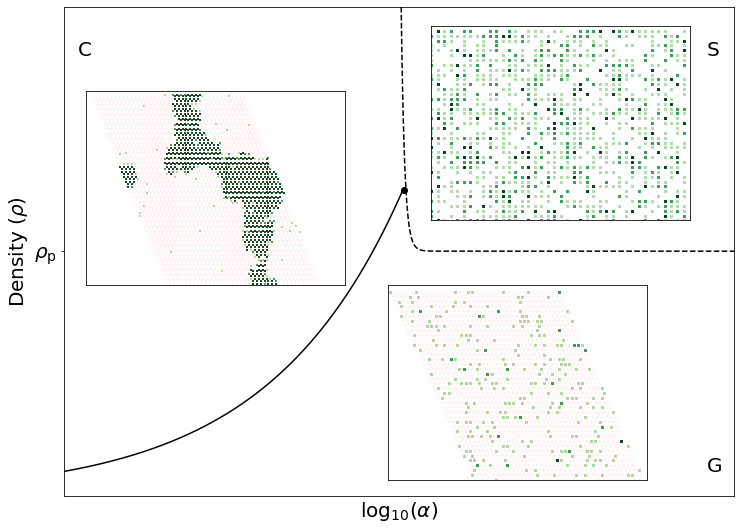

In [5]:


a = np.linspace(-3, 2, 1000)

ac = -0.5

ahigh = np.linspace(ac, 5, 1000)
alow = np.linspace(-3, ac+.03, 1000)

def sec(x):
    return np.abs(x-ac-1)**(-40) + 0.5

def fir(x):
    return np.exp(x)


fig, ax = plt.subplots(figsize=(12, 9))

ax.plot(ahigh-2, sec(ahigh), "k--")
ax.plot(alow, fir(alow), "k-")
ax.plot(max(alow)+.01, fir(max(alow)), "ko")
ax.text(-2.9, 0.9, "C")
ax.text(1.8, 0.9, "S")
ax.text(1.8, 0.05, "G")
#ax.text(max(alow)+.1, fir(max(alow)),  "")
ax.set_xlabel(r"$\log_{10}(\alpha)$")
ax.set_ylabel(r"Density ($\rho$)")
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([0.5])
ax.set_yticklabels([r"$\rho_\mathrm{p}$"])
ax.axis([-3, 2, 0, 1])

ax2 = fig.add_axes([.55, .55, .3, .3])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.scatter(x=squ_conv(sq3[0][::2])[0], y=squ_conv(sq3[0][::2])[1], c=sq3[0][1::2], cmap="Greens", s=4, vmin=0, vmax=3, marker="s")
ax2.axis([0, 40, 0, 40])

ax3 = fig.add_axes([.15, .45, .3, .3])
ax3.set_xticks([])
ax3.set_yticks([])
grid_plot()
ax3.scatter(x=hex_cor(hx3[0][1::4], hx3[0][2::4])[0], y=hex_cor(hx3[0][1::4], hx3[0][2::4])[1], c=hx3[0][3::4], cmap="Greens", s=1, vmin=0, vmax=3, marker="s")
ax3.axis([-35, 80, 0, 60])

ax4 = fig.add_axes([.5, .15, .3, .3])
triang = trian()
ax4.set_xticks([])
ax4.set_yticks([])
ax4.triplot(triang, 'r-', alpha=.1, linewidth=0.3, zorder=1)
ax4.scatter(x=tri_conv(tr3[0][1::3])[0], y=tri_conv(tr3[0][1::3])[1], c=tr3[0][2::3], cmap="Greens", s=4, vmin=0, vmax=3, marker="s")
ax4.axis([-20, 40, 0, 35])



plt.savefig("phase_diagram_maybe_23.pdf", dpi=200)
#plt.show()

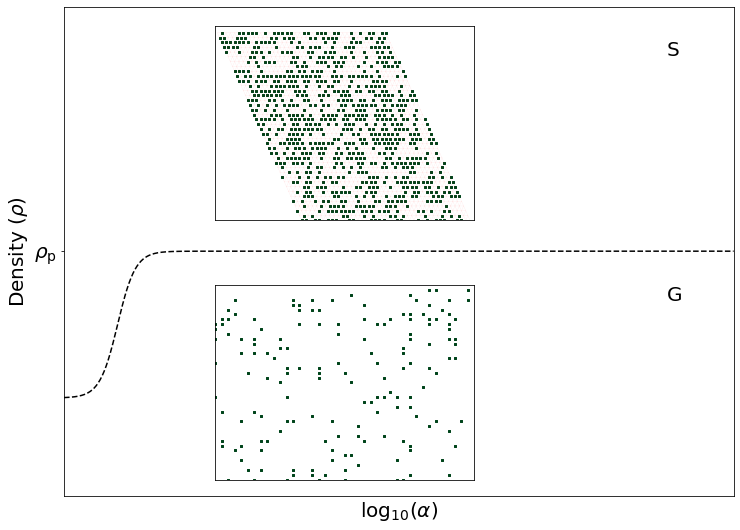

In [7]:
f = open("square_1.txt")
sq1 = []
for line in f:
    sq1.append(np.loadtxt(StringIO(line), dtype=int))

f = open("triangle_1.txt")
tr1 = []
for line in f:
    tr1.append(np.loadtxt(StringIO(line), dtype=int))

a = np.linspace(-3, 2, 1000)
def sigm(x):
    return 0.3*1/(1+np.exp(-15*(x+2.6)))+.2

fig, ax = plt.subplots(figsize=(12, 9))
ax.plot(a, sigm(a), "k--")


ax.text(1.5, .9, "S")
ax.text(1.5, .4, "G")
#ax.text(max(alow)+.1, fir(max(alow)),  "")
ax.set_xlabel(r"$\log_{10}(\alpha)$")
ax.set_ylabel(r"Density ($\rho$)")
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticks([0.5])
ax.set_yticklabels([r"$\rho_\mathrm{p}$"])
ax.axis([-3, 2, 0, 1])

ax2 = fig.add_axes([.3, .15, .3, .3])
ax2.set_xticks([])
ax2.set_yticks([])
ax2.scatter(x=squ_conv(sq1[0][::2])[0], y=squ_conv(sq1[0][::2])[1], c=sq1[0][1::2], cmap="Greens", s=4, vmin=0, vmax=1, marker="s")
ax2.axis([0, 40, 0, 40])

ax4 = fig.add_axes([.3, .55, .3, .3])
triang = trian()
ax4.set_xticks([])
ax4.set_yticks([])
ax4.triplot(triang, 'r-', alpha=.1, linewidth=0.3, zorder=1)
ax4.scatter(x=tri_conv(tr1[0][1::3])[0], y=tri_conv(tr1[0][1::3])[1], c=tr1[0][2::3], cmap="Greens", s=4, vmin=0, vmax=1, marker="s")
ax4.axis([-20, 40, 0, 35])

plt.savefig("phase_diagram_maybe_1.pdf", dpi=200)